In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train_data=pd.read_csv('/kaggle/input/titanic/train.csv')
test_data=pd.read_csv('/kaggle/input/titanic/test.csv')


In [3]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
train_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
train_data.notnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,True,True,True,True,True,True,True,True,True,True,False,True
1,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,False,True
3,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,True,True,True,True,True,True,True,True,True,True,False,True
887,True,True,True,True,True,True,True,True,True,True,True,True
888,True,True,True,True,True,False,True,True,True,True,False,True
889,True,True,True,True,True,True,True,True,True,True,True,True


In [6]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
train_data.notna().sum()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

<AxesSubplot:>

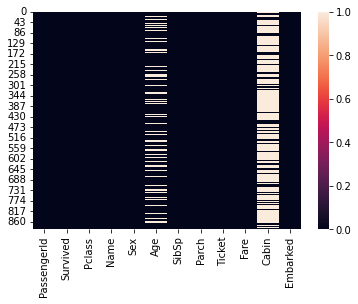

In [8]:
import seaborn as sns
sns.heatmap(train_data.isna())

<AxesSubplot:>

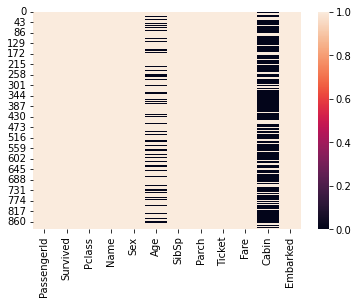

In [9]:
sns.heatmap(train_data.notna())

In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [13]:
train_data.describe().columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [14]:
train_data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [15]:
df_num=train_data[['Age','SibSp','Parch','Fare']]
df_cat=train_data[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

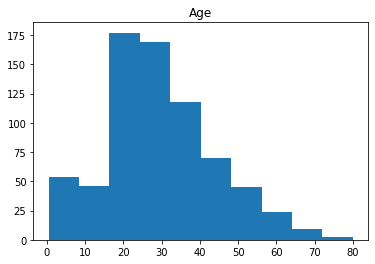

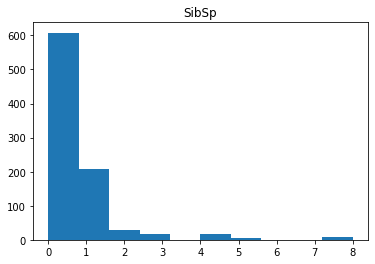

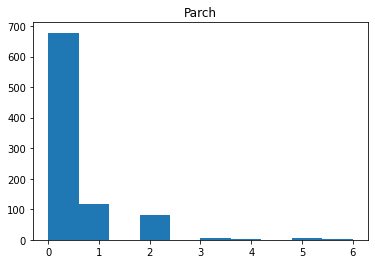

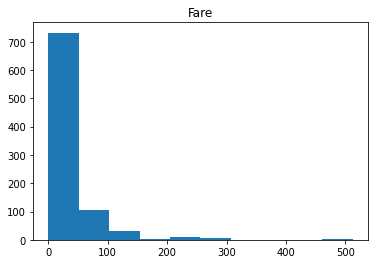

In [16]:
import matplotlib.pyplot as plt
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()
    

In [17]:
df_num.corr()

,Age,SibSp,Parch,Fare
Age,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.308247,1.000000,0.414838,0.159651
Parch,-0.189119,0.414838,1.000000,0.216225
Fare,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:>

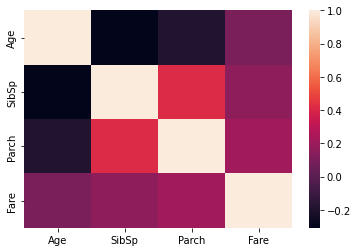

In [18]:

sns.heatmap(df_num.corr())

In [19]:
pd.pivot_table(train_data,index='Survived',values=['Age','SibSp','Parch','Fare'],aggfunc="mean")

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


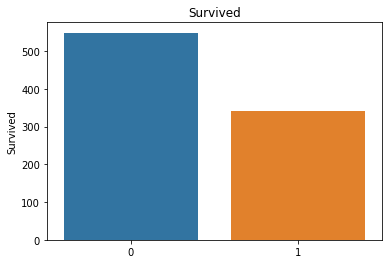

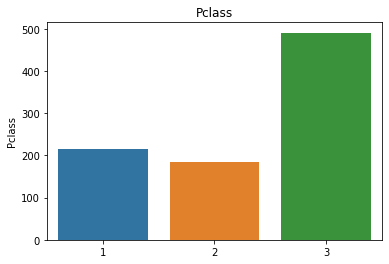

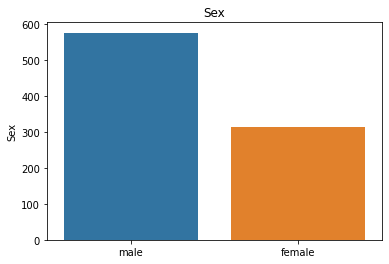

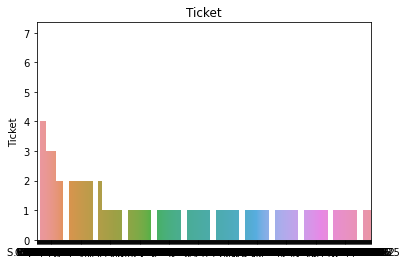

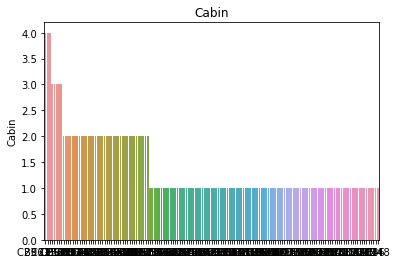

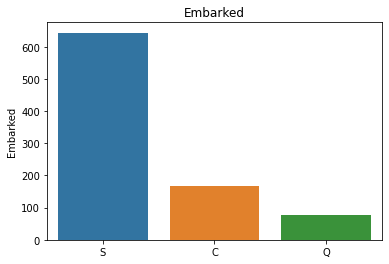

In [20]:
for i in df_cat.columns:
    sns.barplot(x=df_cat[i].value_counts().index,y=df_cat[i].value_counts()).set_title(i)
    plt.show()

In [21]:
pd.pivot_table(train_data,index='Survived',columns='Sex',values='PassengerId',aggfunc='count')

Sex,female,male
Survived,,
0,81,468
1,233,109


In [22]:
pd.pivot_table(train_data,index='Survived',columns='Embarked',values='PassengerId',aggfunc='count')

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [23]:
df_cat[df_cat.Cabin.notnull()].Cabin.head(40)

1              C85
3             C123
6              E46
10              G6
11            C103
21             D56
23              A6
27     C23 C25 C27
31             B78
52             D33
54             B30
55             C52
61             B28
62             C83
66             F33
75           F G73
88     C23 C25 C27
92             E31
96              A5
97         D10 D12
102            D26
110           C110
118        B58 B60
123           E101
124            D26
128          F E69
136            D47
137           C123
139            B86
148             F2
151             C2
166            E33
170            B19
174             A7
177            C49
183             F4
185            A32
193             F2
194             B4
195            B80
Name: Cabin, dtype: object

In [24]:
train_data["cabin_multiple"] = train_data.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
train_data["cabin_multiple"].value_counts()


0    687
1    180
2     16
3      6
4      2
Name: cabin_multiple, dtype: int64

In [25]:
pd.pivot_table(train_data,index='Survived',columns='cabin_multiple',values='Ticket',aggfunc='count')

cabin_multiple,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


In [26]:
train_data['cabin_adv']=train_data.Cabin.apply(lambda x: str(x)[0])

In [27]:
train_data.cabin_adv.value_counts()

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin_adv, dtype: int64

In [28]:
pd.pivot_table(train_data,index='Survived',columns='cabin_adv',values='Name',aggfunc='count')

cabin_adv,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


In [29]:
train_data['Ticket'].sample(20)

436    W./C. 6608
21         248698
413        239853
727         36866
6           17463
837        392092
430        110564
304      A/5 2466
54         113509
639        376564
183        230136
60           2669
238         28665
620          2659
823        392096
112        324669
18         345763
179          LINE
548        363291
231        347067
Name: Ticket, dtype: object

In [30]:
train_data['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

In [31]:
train_data['Ticket'].head(891)

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [32]:
train_data['numeric_ticket']=train_data.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)

In [33]:
pd.pivot_table(train_data,index='Survived',columns='numeric_ticket',values='Name',aggfunc='count')

numeric_ticket,0,1
Survived,,
0,142,407
1,88,254


In [34]:
train_data.Name.head(50)

0                               Braund, Mr. Owen Harris
1     Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                Heikkinen, Miss. Laina
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                              Allen, Mr. William Henry
5                                      Moran, Mr. James
6                               McCarthy, Mr. Timothy J
7                        Palsson, Master. Gosta Leonard
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                   Nasser, Mrs. Nicholas (Adele Achem)
10                      Sandstrom, Miss. Marguerite Rut
11                             Bonnell, Miss. Elizabeth
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
15                     Hewlett, Mrs. (Mary D Kingcome) 
16                                 Rice, Master. Eugene
17                         Williams, Mr. Charles

In [35]:
train_data['name_title']=train_data.Name.apply(lambda x: x.split(',')[1].split(',')[0].strip())

In [36]:
train_data['name_title'].value_counts()

Mr. John                                                        7
Mr. James                                                       7
Miss. Mary                                                      6
Mr. William                                                     6
Mr. William John                                                4
                                                               ..
Mr. Howard Hugh "Harry"                                         1
Master. Hudson Trevor                                           1
Miss. Margaret                                                  1
Mrs. Victor de Satode (Maria Josefa Perez de Soto y Vallejo)    1
Mr. Karl Howell                                                 1
Name: name_title, Length: 803, dtype: int64

In [37]:
train_data['name_title'].head(803)

0                                 Mr. Owen Harris
1      Mrs. John Bradley (Florence Briggs Thayer)
2                                     Miss. Laina
3              Mrs. Jacques Heath (Lily May Peel)
4                               Mr. William Henry
                          ...                    
798                                  Mr. Yousseff
799    Mrs. Jean Baptiste (Rosalie Paula Govaert)
800                                    Mr. Martin
801            Mrs. Harvey (Charlotte Annie Tate)
802                   Master. William Thornton II
Name: name_title, Length: 803, dtype: object

In [38]:
train_data['train']=1
test_data['train']=0
test_data['Survived']=np.NaN
all_data=pd.concat([train_data,test_data])
all_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_multiple,cabin_adv,numeric_ticket,name_title,train
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0,n,0.0,Mr. Owen Harris,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1.0,C,0.0,Mrs. John Bradley (Florence Briggs Thayer),1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0,n,0.0,Miss. Laina,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1.0,C,1.0,Mrs. Jacques Heath (Lily May Peel),1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0,n,1.0,Mr. William Henry,1


In [39]:
all_data["cabin_multiple"] = all_data.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
all_data['cabin_adv']=all_data.Cabin.apply(lambda x: str(x)[0])
all_data['numeric_ticket']=all_data.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
all_data['name_title']=all_data.Name.apply(lambda x: x.split(',')[1].split(',')[0].strip())


In [40]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     1309 non-null   int64  
 1   Survived        891 non-null    float64
 2   Pclass          1309 non-null   int64  
 3   Name            1309 non-null   object 
 4   Sex             1309 non-null   object 
 5   Age             1046 non-null   float64
 6   SibSp           1309 non-null   int64  
 7   Parch           1309 non-null   int64  
 8   Ticket          1309 non-null   object 
 9   Fare            1308 non-null   float64
 10  Cabin           295 non-null    object 
 11  Embarked        1307 non-null   object 
 12  cabin_multiple  1309 non-null   int64  
 13  cabin_adv       1309 non-null   object 
 14  numeric_ticket  1309 non-null   int64  
 15  name_title      1309 non-null   object 
 16  train           1309 non-null   int64  
dtypes: float64(3), int64(7), object(7)

In [41]:
all_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,cabin_multiple,numeric_ticket,train
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1309.000000,1309.000000,1309.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479,0.271963,0.731092,0.680672
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668,0.574151,0.443561,0.466394
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000,1.000000,1.000000
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000,0.000000,1.000000,1.000000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200,4.000000,1.000000,1.000000


In [42]:
all_data.Age = all_data.Age.fillna(train_data.Age.median())
all_data.Fare= all_data.Fare.fillna(train_data.Age.median())

In [43]:
all_data.dropna(subset=['Embarked'], inplace=True)

In [44]:
all_data['Pclass'].value_counts()

3    709
1    321
2    277
Name: Pclass, dtype: int64

In [45]:
all_data.Pclass = all_data.Pclass.astype(str)

In [46]:
all_dummies= pd.get_dummies(all_data[['Pclass','Sex','Age','SibSp','Parch','Embarked','cabin_adv','cabin_multiple','numeric_ticket','name_title','train']])

In [47]:
all_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1307 entries, 0 to 417
Columns: 1164 entries, Age to name_title_the Countess. of (Lucy Noel Martha Dyer-Edwards)
dtypes: float64(1), int64(5), uint8(1158)
memory usage: 1.5 MB


In [48]:
all_dummies.isna().sum()

Age                                                            0
SibSp                                                          0
Parch                                                          0
cabin_multiple                                                 0
numeric_ticket                                                 0
                                                              ..
name_title_Rev. Robert James                                   0
name_title_Rev. Thomas Roussel Davids                          0
name_title_Rev. William                                        0
name_title_Sir. Cosmo Edmund ("Mr Morgan")                     0
name_title_the Countess. of (Lucy Noel Martha Dyer-Edwards)    0
Length: 1164, dtype: int64

In [49]:
all_dummies.notna().sum()

Age                                                            1307
SibSp                                                          1307
Parch                                                          1307
cabin_multiple                                                 1307
numeric_ticket                                                 1307
                                                               ... 
name_title_Rev. Robert James                                   1307
name_title_Rev. Thomas Roussel Davids                          1307
name_title_Rev. William                                        1307
name_title_Sir. Cosmo Edmund ("Mr Morgan")                     1307
name_title_the Countess. of (Lucy Noel Martha Dyer-Edwards)    1307
Length: 1164, dtype: int64

<AxesSubplot:>

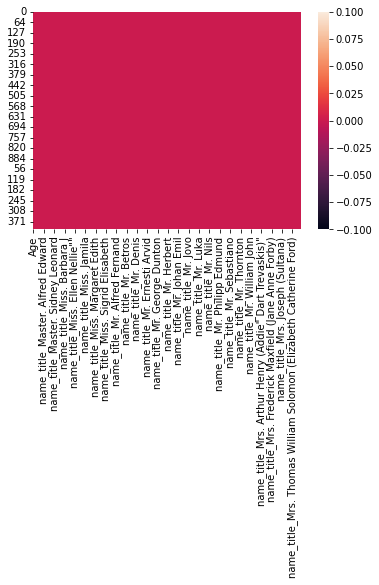

In [50]:
sns.heatmap(all_dummies.isnull())

In [51]:
X_train =all_dummies[all_dummies.train==1].drop(['train'],axis=1)
X_test =all_dummies[all_dummies.train==0].drop(['train'],axis=1)

In [52]:
y_train=all_data[all_data.train==1].Survived
y_train.shape

(889,)

In [53]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_multiple,cabin_adv,numeric_ticket,name_title,train
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,n,0,Mr. Owen Harris,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,C,0,Mrs. John Bradley (Florence Briggs Thayer),1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,n,0,Miss. Laina,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,C,1,Mrs. Jacques Heath (Lily May Peel),1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,n,1,Mr. William Henry,1


In [54]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  train        418 non-null    int64  
 12  Survived     0 non-null      float64
dtypes: float64(3), int64(5), object(5)
memory usage: 42.6+ KB


In [55]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,train,Survived
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000,418.0,0.0
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188,0.0,NaN
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576,0.0,NaN
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.0,NaN
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800,0.0,NaN
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200,0.0,NaN
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000,0.0,NaN
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200,0.0,NaN


In [56]:
test_data.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'train', 'Survived'],
      dtype='object')

In [57]:
test_data.describe().columns

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'train',
       'Survived'],
      dtype='object')